Importing all required libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Loading the dataset and examinining its dimensions.

In [2]:
df = pd.read_excel('flight_price.xlsx')

In [3]:
df.shape

(10683, 11)

This dataset has 10683 rows and 11 columns

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#Dataset Cleaning

In [5]:
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_min']=df['Dep_Time'].str.split(':').str[1]

In [6]:
df.drop('Dep_Time',axis=1,inplace=True)

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,16,50


In [8]:
df['Arrival_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [9]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [10]:
def convert_into_minutes(Duration):
  total_minutes = 0
  for i in Duration.split():
      if 'h' in i:
        total_minutes+=int(i.replace('h',''))*60
      if 'm' in i:
        total_minutes+=int(i.replace('m',''))

  return total_minutes

In [11]:
df['Duration']=df['Duration'].apply(convert_into_minutes)

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,01,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,05,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,09,25,04,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,05,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35


In [13]:
df.drop('Route',axis=1,inplace=True)
df.drop('Additional_Info',axis=1,inplace=True)

In [14]:
df['Airline'] = df['Airline'].replace({'Jet Airways': 1,'IndiGo': 2,'Air India': 3,'Multiple carriers': 4,'SpiceJet': 5,'Vistara': 6,'Air Asia': 7,'GoAir': 8,'Multiple carriers Premium economy': 4,'Jet Airways Business': 1,'Vistara Premium economy': 6,'Trujet': 5})
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4, 'nan':1})
df['Source']=df['Source'].map({'Delhi':0, 'Kolkata':1, 'Banglore':2, 'Mumbai':3, 'Chennai':4})
df['Destination']=df['Destination'].map({'Cochin':0, 'Banglore':1, 'Delhi':2, 'New Delhi':3, 'Hyderabad':4, 'Kolkata':5})

In [15]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,2,24/03/2019,2,3,170,0.0,3897,22,20,01,10
1,3,1/05/2019,1,1,445,2.0,7662,05,50,13,15
2,1,9/06/2019,0,0,1140,2.0,13882,09,25,04,25
3,2,12/05/2019,1,1,325,1.0,6218,18,05,23,30
4,2,01/03/2019,2,3,285,1.0,13302,16,50,21,35


Hsitogram to visualize the distribution of flight prices in the dataset

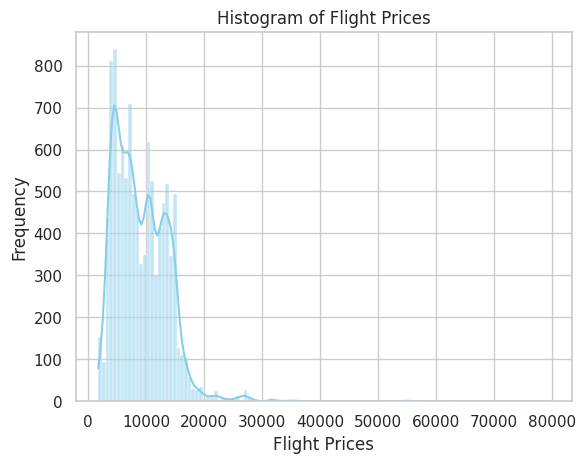

In [16]:
sns.set(style="whitegrid")
sns.histplot(data=df, x='Price', kde=True, color='skyblue')
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Prices')
plt.show()

In [17]:
df['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10683 entries, 0 to 10682
Series name: Price
Non-Null Count  Dtype
--------------  -----
10683 non-null  int64
dtypes: int64(1)
memory usage: 83.6 KB


In [18]:
df['Price'].max()

79512

In [19]:
df['Price'].min()

1759

Flight prices of the dataset ranges from minimum 1759 to highest 79512

<ipython-input-20-bc6ccd81af8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Airline', y='Price', palette='Set3')


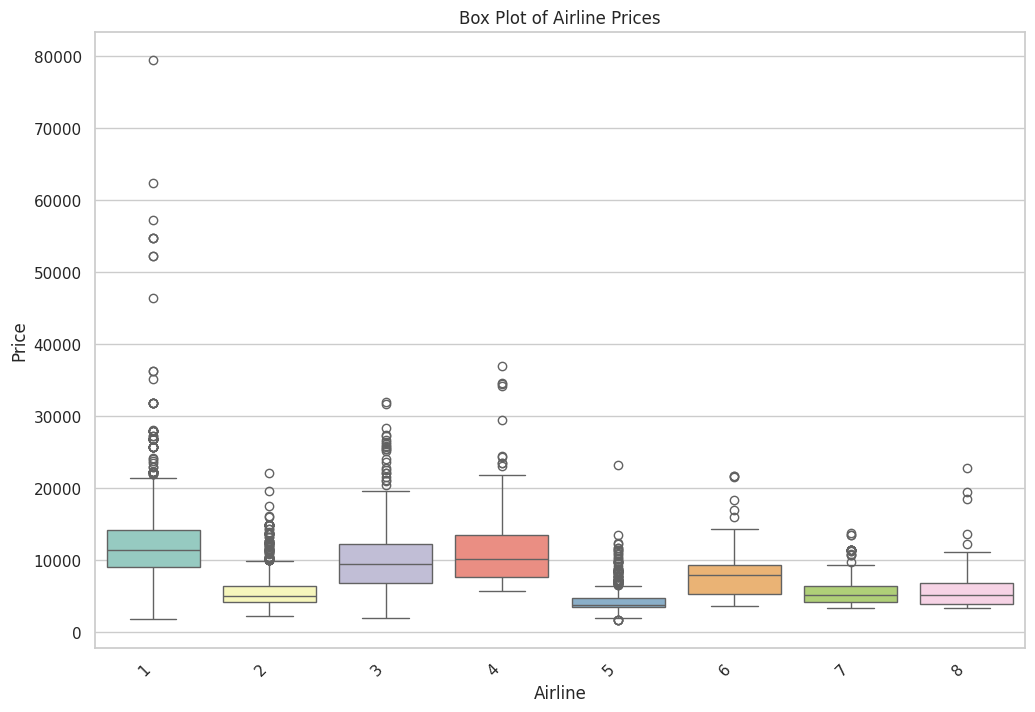

In [20]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Box Plot of Airline Prices')
sns.boxplot(data=df, x='Airline', y='Price', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.show()

We see a lot of outliers in the dataset.
Outliers may impact our analysis in following ways:
- The median is less affected and provides a more robust alternative.
- Negative impact on machine learning models.
- Models might give undue importance to outliers, affecting accuracy and generalization.
- Potential for incorrect conclusions if outliers are not appropriately addressed.

In [21]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Duration',
       'Total_Stops', 'Price', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min'],
      dtype='object')

In [22]:
df['date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]
df.head()
#added date, month, year columns as numerical value instead of object so we can remove date of journey

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,date,month,year
0,2,24/03/2019,2,3,170,0.0,3897,22,20,01,10,24,03,2019
1,3,1/05/2019,1,1,445,2.0,7662,05,50,13,15,1,05,2019
2,1,9/06/2019,0,0,1140,2.0,13882,09,25,04,25,9,06,2019
3,2,12/05/2019,1,1,325,1.0,6218,18,05,23,30,12,05,2019
4,2,01/03/2019,2,3,285,1.0,13302,16,50,21,35,01,03,2019


In [23]:
df.drop('Date_of_Journey',axis=1,inplace=True)

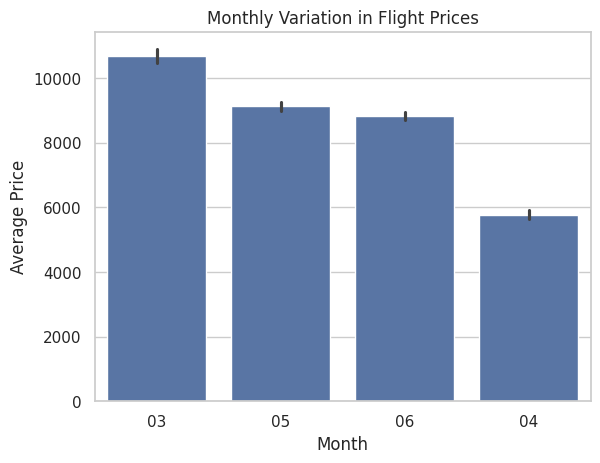

In [24]:
sns.set(style="whitegrid")
sns.barplot(data=df, x='month', y='Price')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Monthly Variation in Flight Prices')
plt.show()

In [25]:
df['month'].unique()

array(['03', '05', '06', '04'], dtype=object)

Here we made a barplot to understand that

<ipython-input-26-88a091fb0574>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Airline', y='Price', ci=None, palette='viridis')
<ipython-input-26-88a091fb0574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Airline', y='Price', ci=None, palette='viridis')


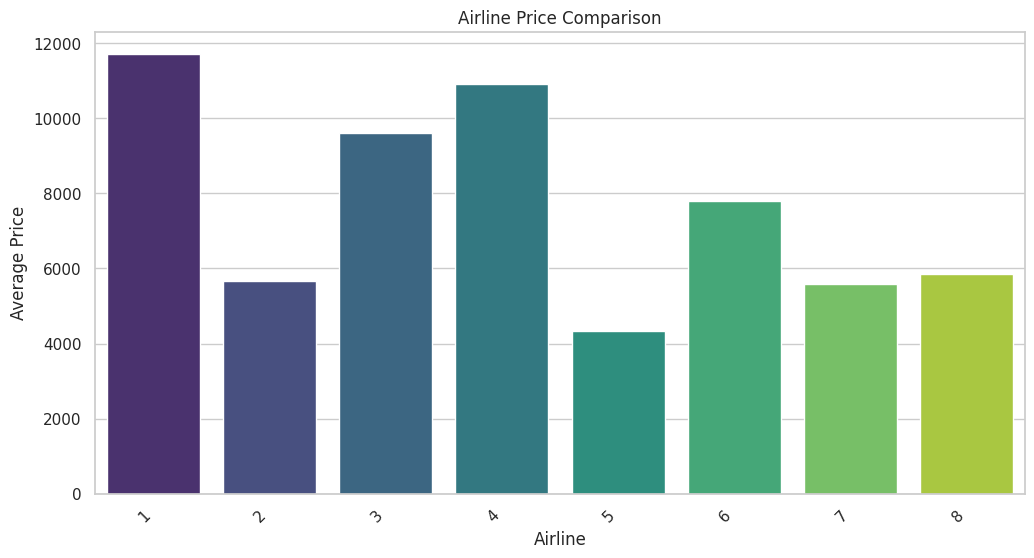

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Airline', y='Price', ci=None, palette='viridis')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Airline Price Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Total_Stops', y='Price', palette='Blues')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.title('Flight Prices Based on Total Stops')
plt.show()


In [ ]:
#heatmap to calculate the heatmap
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the column names as labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Show the plot
plt.show()

##You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

To discern patterns in flight prices on a flight booking website, an analysis of various features influencing pricing can be conducted. Some potential visualizations include:

- Deployment of a line plot or time series plot to illustrate the pricing trend over time.
- Utilization of boxplots or line plots with seasonal breakdowns for a detailed analysis.
- Creation of a bar chart or boxplot to compare prices on different days.
- Generation of a scatter plot or boxplot to investigate whether longer or shorter flights exhibit distinct price distributions.
- Implementation of boxplots or bar charts to assess price disparities based on the number of stops.
- Construction of a heatmap or grouped bar chart displaying average prices for different routes.
- Use of a violin plot, boxplot, or grouped bar chart for airline-wise comparisons of prices.
- Development of grouped bar charts or boxplots to showcase variations in prices for each category.
- Exploration of interaction plots or multi-variable visualizations for a comprehensive understanding.
- Examination of a correlation matrix to identify relationships between variables.

##You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Factors to be considered:
- Path and Travel Distance
- Airlines
- Day and Time of Travel
- Duration and Stops
- Source and Destination Airports

Visualizations for presentation:
- Employ scatter plots or grouped bar charts to illustrate average prices across various routes or distance categories.
- Utilize violin plots, boxplots, or grouped bar charts for a comprehensive airline-wise price analysis.
- Employ bar charts or boxplots to showcase average prices based on different days and times.
- Use scatter plots or boxplots to depict the relationship between duration/stops and prices.
- Apply a heatmap or grouped bar chart to visualize average prices for different airport combinations.
- Implement time series plots or annotated line charts for a dynamic representation.
- Develop interactive dashboards or tools to enable management to explore the data, gaining insights into the impact of diverse factors on prices.